# Лабараторная работа 2

Вариант 18

Сребродольский Денис Владимирович, A-13-23

Индивидуальные задачи: 2.1.3,  2.2.5,  2.5.1

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# Задача 2.1.3

Методом секущей и методом Ньютона найти вещественные корни уравнения $f(x) = e^{x} +1 - \sqrt{9 - x^{2}}$ с точностью $\varepsilon = 10^{-12}$

In [153]:
def f(x):
    sqrt_arg = np.maximum(9 - x**2, 0)
    return np.exp(x) + 1 - np.sqrt(sqrt_arg)

def df(x):
    sqrt_arg = np.maximum(9 - x**2, 1e-12)
    return np.exp(x) + x / np.sqrt(sqrt_arg)

In [154]:
# Метод Ньютона
def newton(f, df, x0, eps=1e-12, max_iter=1000):
    x = x0
    iterations = 0
    for _ in range(max_iter):
        fx = f(x)
        if abs(fx) < eps:
            break
        dfx = df(x)
        if abs(dfx) < 1e-15:
            break
        x = x - fx / dfx
        iterations += 1
    return x, iterations

# Метод секущих
def secant(f, x0, x1, eps=1e-12, max_iter=1000):
    x_prev, x_curr = x0, x1
    iterations = 0
    for _ in range(max_iter):
        f_prev = f(x_prev)
        f_curr = f(x_curr)
        if abs(f_curr) < eps:
            break
        denominator = f_curr - f_prev
        if abs(denominator) < 1e-15:
            break
        x_next = x_curr - f_curr*(x_curr - x_prev)/denominator
        x_prev, x_curr = x_curr, x_next
        iterations += 1
    return x_curr, iterations

## 1. Локализация корней

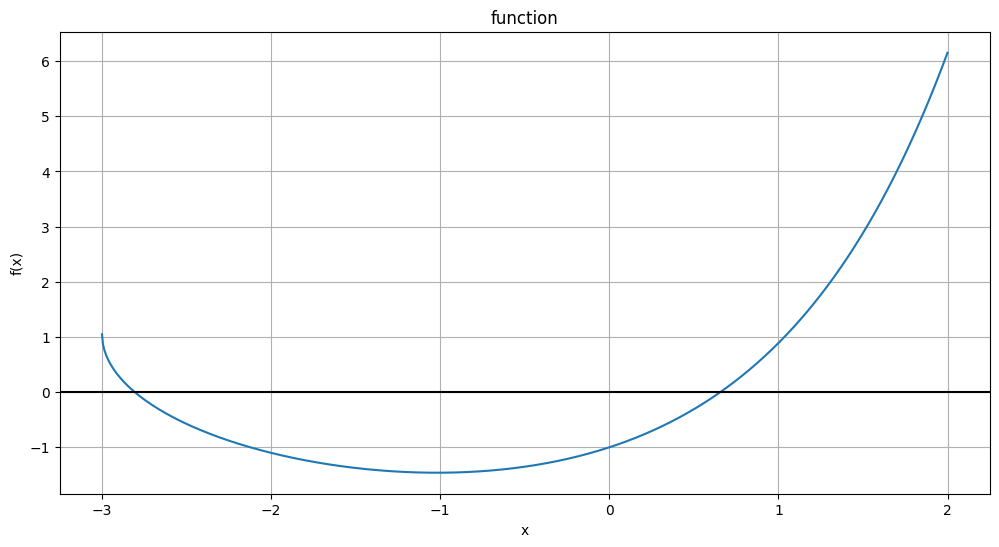

In [155]:

# Построение графика функции
x_vals = np.linspace(-3, 2, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.axhline(0, color='black', linestyle='-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('function')
plt.show()

$[-3, -2] ~ -$ первый корень

$[0, 1] ~ -$ второй корень

In [156]:
# Параметры решения
segments = [(-3, -2), (0, 1)]  # Отрезки локализации
eps = 1e-12
n_iters = 10
data = {
    "base approximation": [sum(segments[0]) / 2, sum(segments[1]) / 2],
    "root (N)": [],
    "root (S)": [],
    'iter (N)': [],
    'iter (S)': []
       }


## 2. метод Ньютона

In [157]:

# Вычисление корней
print("Newtont method:")
for i, (a, b) in enumerate(segments):
    x0 = (a + b)/2  # Среднее значение отрезка
    root, iters = newton(f, df, x0, eps)
    data["root (N)"].append(root)
    data["iter (N)"].append(iters)
    print(f"root {i+1}: {root:.12f}, iter: {iters}")

Newtont method:
root 1: -2.806331437856, iter: 5
root 2: 0.656153496685, iter: 4


## 3. метод Секущих

In [158]:

print("\nSecant method:")
for i, (a, b) in enumerate(segments):
    root, iters = secant(f, a, b, eps)
    data["root (S)"].append(root)
    data["iter (S)"].append(iters)
    print(f"root {i+1}: {root:.12f}, iter: {iters}")


Secant method:
root 1: -2.806331437856, iter: 9
root 2: 0.656153496686, iter: 6


## 4. Сравнение

In [159]:
data = pd.DataFrame(data)
data

,base approximation,root (N),root (S),iter (N),iter (S)
0,-2.5,-2.806331,-2.806331,5,9
1,0.5,0.656153,0.656153,4,6


## 5. Модифицируем методы

In [160]:
# Модифицированные методы для сбора невязок
def newton_mod(f, df, x0, n_iters=10):
    residuals = []
    x = x0
    for _ in range(n_iters):
        x = x - f(x)/df(x)
        residuals.append(abs(f(x)))
    return np.array(residuals)

def secant_mod(f, x0, x1, n_iters=10):
    residuals = []
    x_prev, x_curr = x0, x1
    for _ in range(n_iters):
        denominator = f(x_curr) - f(x_prev)
        if abs(denominator) < 1e-15:
            break
        x_next = x_curr - f(x_curr)*(x_curr - x_prev)/denominator
        residuals.append(abs(f(x_next)))
        x_prev, x_curr = x_curr, x_next
    return np.array(residuals)

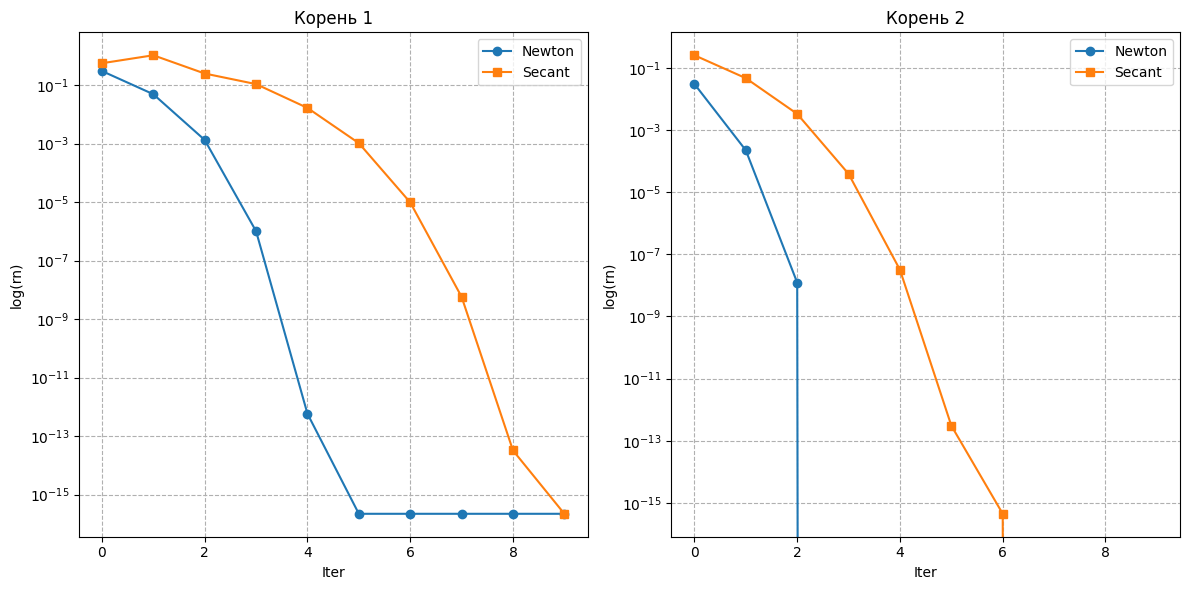

In [161]:
# Построение графиков сходимости
plt.figure(figsize=(12, 6))

for i, (a, b) in enumerate(segments):
    # Начальные приближения
    x0_newton = (a + b)/2
    x0_sec, x1_sec = a, b
    
    # Вычисление невязок
    res_newton = newton_mod(f, df, x0_newton, n_iters)
    res_secant = secant_mod(f, x0_sec, x1_sec, n_iters)
    
    # Построение графиков
    plt.subplot(1, 2, i+1)
    plt.semilogy(res_newton, 'o-', label='Newton')
    plt.semilogy(res_secant, 's-', label='Secant')
    plt.title(f'Корень {i+1}')
    plt.xlabel('Iter')
    plt.ylabel('log(rn)')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()

#### 1) Можно ли по графикам определить порядок сходимости методов?

Да, порядок сходимости можно оценить по наклону графика в логарифмической шкале:
Метод Ньютона (квадратичная сходимость): резкий наклон, невязка уменьшается пропорционально квадрату ошибки
Метод секущих: более плавный наклон, что указывает на меньший порядок сходимости.

#### 2) Как порядок сходимости влияет на количество итераций? Соответствует ли это теории?

Метод Ньютона сошелся за 5 итераций, метод секущих — за 9, что соответствует теоретическим ожиданиям: метод Ньютона (квадратичный) быстрее метода секущих.

#### 3) Будет ли на практике невязка стремиться к нулю?

Да, но только до определенного предела. Невязка уменьшается до порядка $10^{-16}$, что близко к машинной точности, и дальше не может уменьшаться из-за ограничений арифметики с плавающей точкой.

#### 4) Может ли невязка быть равна нулю на некоторой итерации?

Нет, в практических вычислениях невязка не достигает точного нуля. Минимальное значение ограничено точностью вычислений.


# Вывод:
Метод Ньютона показал себя более эффективным по сравнению с методом секцущих, что было объяснено ранее с математической точки зрения.

# Задача 2.2.5

Даны два уравнения  $f(x)=0$ и $g(x)=0$. Найти корни уравнений, содержащиеся на отрезке $[a,b]$

## 1. Решение уравнений на отрезке $[0, 1{,}5]$

Даны два уравнения:

1. $f(x) = \cos^2(x) - \left(\frac{1}{\sqrt{2}} + \frac{1}{4} \right)\cos(x) + \frac{1}{4\sqrt{2}} = 0$
2. $g(x) = \cos^2(x) - \frac{2}{\sqrt{2}}\cos(x) + \frac{1}{2} = 0$

---

### Решение уравнения $f(x) = 0$

Обозначим $y = \cos(x)$. Тогда уравнение принимает вид:

$$
y^2 - \left(\frac{1}{\sqrt{2}} + \frac{1}{4} \right)y + \frac{1}{4\sqrt{2}} = 0
$$

Вычислим приближённые значения:

- $b = \left(\frac{1}{\sqrt{2}} + \frac{1}{4}\right) \approx 0.9571067$
- $c = \frac{1}{4\sqrt{2}} \approx 0.1767766$

Дискриминант:

$$
D = b^2 - 4ac \approx 0.9571067^2 - 4 \cdot 0.1767766 \approx 0.20894660
$$

Корни:

$$
y_{1,2} = \frac{0.9571067 \pm \sqrt{0.20894660}}{2} \approx \{0.7071067, 0.25\}
$$

$x_1 = \arccos(0.7071067) \approx \frac{\pi}{4}$ если подставить, то $\frac{\pi}{4}$ является корнем

$x_2 = \arccos(0.25) \approx 1.3181160$


---

### Решение уравнения $g(x) = 0$

Преобразуем уравнение:

$$
y^2 - \sqrt{2}y + \frac{1}{2} = 0
$$

Дискриминант:

$$
D = (\sqrt{2})^2 - 4 \cdot \frac{1}{2} = 2 - 2 = 0
$$

Единственный корень:

$$
y = \frac{\sqrt{2}}{2} \approx 0.707
$$

Тогда:

$$
x = \arccos\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{4} \approx 0.785
$$

---

### Ответ:

- Корень $f(x) = 0$ на $[0, 1{,}5]$:
  $x_1 = \frac{\pi}{4}$
  $x_2  \approx 1.3181160$

- Корень $g(x) = 0$ на $[0, 1{,}5]$:
  $x = \frac{\pi}{4}$


## 2. Метод бисекции f(x)

In [162]:
def f_2(x):
    return np.cos(x) ** 2 - (1/(2**0.5) + 1/4) * np.cos(x) + 1/(4*(2**0.5))

def g_2(x):
    return np.cos(x) ** 2 - (2 / (2**0.5)) * np.cos(x) + 1/2

def bisection(a, b, func, tol=1e-10):
    mid = (a + b) / 2
    f_mid = func(mid)
    
    if abs(b - a) < 2 * tol or f_mid == 0:
        return mid

    f_a = func(a)

    if f_a * f_mid < 0:
        return bisection(a, mid, func, tol)
    else:
        return bisection(mid, b, func, tol)


In [163]:
bissection(0, 1, f_2)

0.7853981634252705

In [164]:
bissection(1, 2, f_2)

1.3181160716922022

## 3. Метод бисекции g(x)

In [165]:
bissection(0, 2, g_2) # Знак не меняется на концах отрезка, какой бы мы не взяли

## 4. Встроенный метод

In [166]:
scipy.optimize.fsolve(f_2, 1)

array([0.78539816])

In [167]:
scipy.optimize.fsolve(f_2, 2)

array([1.31811607])

In [168]:
scipy.optimize.fsolve(g_2, 1)

C:\Users\Salam\AppData\Local\Temp\ipykernel_8128\4202533996.py:1: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  scipy.optimize.fsolve(g_2, 1)


array([0.78539817])

## 5. Вывод

Для g(x) результат мы не получили по причине строгой неотрицательности функций, что по сущности метода бисекции недопустимо. В первой функции знаки менялись, так что результаты мы получили, причём они сошлись с аналитическим решением. 

# Задача 2.5.1

Дано уравнение.  Найти все  корни уравнения с заданной точностью $\varepsilon = 10^{-12}$
методом простой итерации. 

$f(x) = sin(x) + 2x^2 +4x$

## 1. Локализация корней

In [169]:
def f_5(x):
    return np.sin(x) + 2 * x ** 2 + 4 * x

def df_5(x):
    return np.cos(x) + 4*x + 4

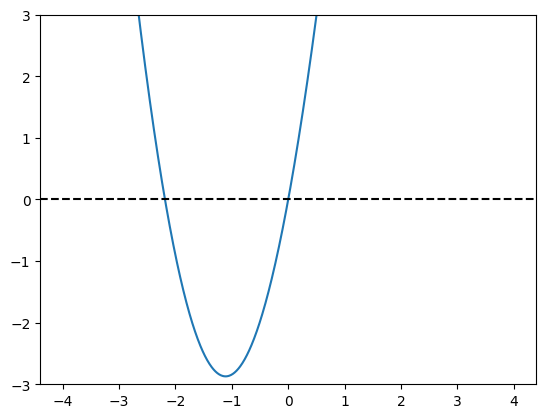

In [170]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, f_5(x))
plt.ylim(-3, 3)
plt.axhline(0, color="black", linestyle='--')
plt.show()

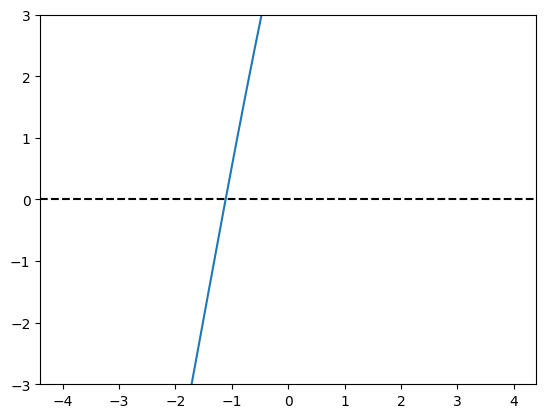

In [171]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, df_5(x))
plt.ylim(-3, 3)
plt.axhline(0, color="black", linestyle='--')
plt.show()

Первый корень: $[-3, -1.5]$

Второй корень: $[-1, 1]$

## 2.Преобразование к виду $x = \varphi(x)$

### Преобразование к виду с параметром

$f'(x) = cos(x) + 4x + 4$

Для отрезка $[-3, -1.5]$: 

$M = min_{[-3, -1.5]}f'(x)$ = $f'(-3) = -8.98999$ 

$m = max_{[-3, -1.5]} = f'(-1.5) = -1.92926$

$q = \frac{M - m}{M + m} = \frac{-7.06073}{-10.91925} \approx 0.64663$

$\alpha = \frac{2}{M + m} \approx -0.18316$

Для отрезка $[-1, 1]$: 

$m = min_{[-1, 1]}f'(x)$ = $f'(-1) = 0.5403$ 

$M = max_{[-1, 1]} = f'(1) = 8.5403$

$q = \frac{M - m}{M + m} \approx 0.881$

$\alpha = \frac{2}{M + m} \approx 0.22025$

$[-3, -1.5]$: $|1 - \alpha f'(x)| = |1 - (-0.18316)f'(-1.5)| = 0.64663$

$[-1, 1]$: $|1 - \alpha f'(x)| = |1 - (0.22025)f'(-1)| = 0.88099$

$\Rightarrow$ достаточное условие сходимости метода с параметром сходится для двух отрезков локализации

### Преобразование к базовому методу простой итерации

$x = -\frac{sin(x) + 2x^2}{4} = \varphi (x)$

$\varphi '(x) = -\frac{1}{4}(cos(x) + 4x)$

Для отрезка $[-3, -1.5]$:

$q = max_{[-3, -1.5]} |\varphi'(x)| = 3.2475 > 1$

Для отрезка $[-1, 1]$: 

$q = max_{[-1, 1]} |\varphi'(x)| = 1.135 > 1$

Попробуем другую функцию:

$x = \sqrt{\frac{-sin(x) - 4x}{2}} = \varphi_1(x)$

$\varphi_1'(x) = \dfrac{-\cos\left(x\right)-4}{2\,\sqrt{2}\,\sqrt{-\sin\left(x\right)-4\,x}}$

$q = max_{[-3, -1.5]} |\varphi_1'(x)| = 0.54407$


$[-3, -1.5]$: $q = max_{[-3, -1.5]} |\varphi'(x)| = 3.2475 >= 1$

$q = max_{[-3, -1.5]} |\varphi_1'(x)| = 0.54407 < 1$

$[-1, 1]$: $q = max_{[-1, 1]} |\varphi'(x)|$  не определено

Аналогично для выражения через $\arcsin$

$\Rightarrow$ достаточное условие сходимости метода простых итераций сходится только для одного отрезка локализации

#### По итогу имеет метод итерации с параметром для 2 отрезков локализаций и метод простой итерации для 1 отрезка.

In [172]:
simple_iteration_with_alpha(f_5, df_5, -3, -1.5)

(-2.1866507832669053, 12)

In [173]:
simple_iteration_with_alpha(f_5, df_5, -1, 1)

(5.516018090371699e-15, 14)

In [174]:
def simple_iteration(phi, phi_prime, x0, a, b, tol=1e-12):
    x = x0 
    x_new = phi(x)
    # предполагается что функции производных монотонны, что справедливо для наших случаев
    q = max([(abs(phi_prime(x))) for x in [a, b]])
    if q >= 1:
        raise Exception("wrong iter function") 
    eps = (1 - q) * tol / q
    iters = 1

    while abs(x - x_new) >= tol:
        
        x = x_new
        x_new = phi(x) 
        iters += 1
    return (x_new, iters)

def iterf(x):
    return -1/4 * (np.sin(x) + 2 * x ** 2)

def diterf(x):
    return -1/4 * (np.cos(x) + 4 * x)

def iterf_1(x):
    return -np.sqrt(abs((-np.sin(x) - 4*x) / (2)))

def diterf_1(x):
    return (-np.cos(x) - 4) / (2 * np.sqrt(2) * np.sqrt(-np.sin(x) - 4 * x))

In [175]:
simple_iteration(iterf_1, diterf_1, -3, -3, -1.5)

(-2.186650783267292, 30)

## 4. Вывод (сравнение результатов):

Метод простой итерации с параметром $ \alpha $ показал наилучшую сходимость: он потребовал наименьшее число итераций (12, 14) для достижения заданной точности $ \varepsilon = 10^{-12} $.

Обычный метод простой итерации требует выполнения условия $ q < 1 $ для сходимости, что ограничивает выбор функции $ \varphi(x) $ и отрезка. При этом:
- Метод с функцией $ \varphi_1(x) $, где $ q = 0.54407 $, сходился медленно (30 итераций).
- Для второго корня метода простой итерации вообще говоря не существует в базовом виде, что уже было показано в вычислениях ранее

Таким образом, **метод простой итерации с параметром $ \alpha $** является более эффективным по числу итераций и менее чувствительным к выбору отрезка, особенно при высоких значениях $ q $.
